In [1]:
import pickle
import os
import pandas as pd
import numpy as np 
from tqdm import tqdm
from util import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
### X
price_df = pd_setting(pd.read_csv("./data/features/price_df.csv"))
mu_df = pd_setting(pd.read_csv("./data/features/mu_df.csv"))
sigma_df = pd_setting(pd.read_csv("./data/features/sigma_df.csv"))

feat_date = list(price_df.index)

In [4]:
dff = pd_setting(pd.read_csv("./data/df_XY.csv"))

dfy = dff.loc[feat_date]
# extracting Y columns
Y_col = [x for x in dfy.columns if x[-2:]=='_Y']
dfy = dfy[Y_col]

In [5]:
path = "./RESULT/LSTM_120_seq"
res_ls = os.listdir(os.path.join(path))
res_ls.sort()

In [6]:
result_all = []
for f_name in tqdm(res_ls):
    df = pd.DataFrame(pd.read_pickle(os.path.join(path,f_name)))
    result_all.append(df)
result_table = pd.concat(result_all)

100%|██████████| 106/106 [00:00<00:00, 1805.54it/s]


In [7]:
result_table.columns

Index(['Date', 'X_date', 'pred_w', 'pred_mu', 'true_w', 'true_mu',
       'test_loss(%)'],
      dtype='object')

In [8]:
# Date Month 
last_day = [x[0][1] for x in result_table['Date'].values]
first_day = [x[0][0] for x in result_table['Date'].values]

# reindexing by date
result_table.index = last_day
result_table = result_table.sort_index()
last_day = list(result_table.index)

In [9]:
result_table['test_loss(%)']/100

2012-07-31    0.0077
2012-08-31    0.0032
2012-09-28    0.0071
2012-10-31    0.0028
2012-11-30    0.0033
               ...  
2020-12-31    0.0029
2021-01-29    0.0057
2021-02-26    0.0031
2021-03-31    0.0076
2021-04-30    0.0062
Name: test_loss(%), Length: 106, dtype: float64

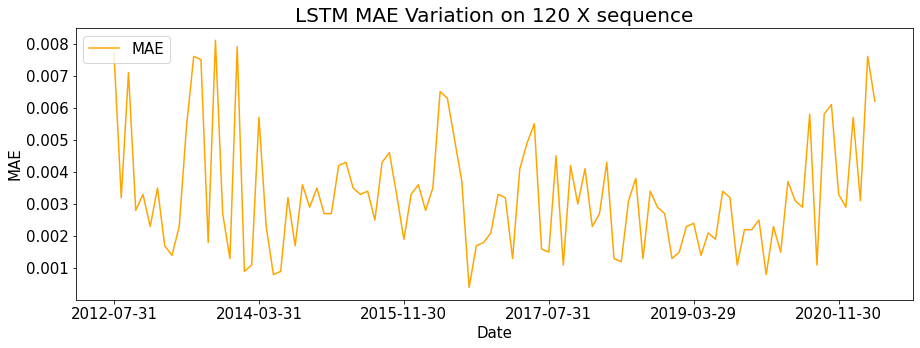

In [10]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['test_loss(%)'].values/100, label = 'MAE', color = 'orange')
plt.title("LSTM MAE Variation on 120 X sequence", fontsize = 20)
plt.ylabel("MAE", fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [11]:
np.mean(result_table['test_loss(%)'].values/100)

0.0032669811320754716

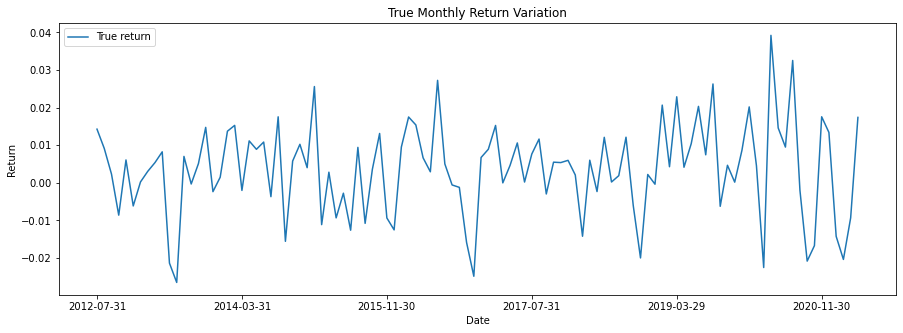

In [12]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_mu'].values, label = 'True return')
plt.title("True Monthly Return Variation")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

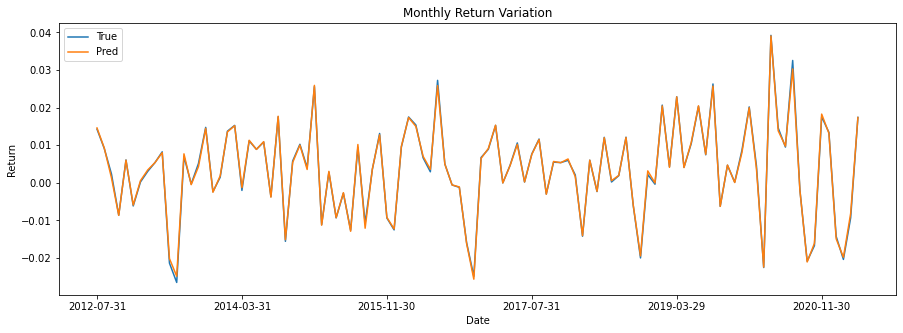

In [13]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_mu'].values, label = 'True')
plt.plot(result_table['pred_mu'].values, label = 'Pred')
plt.title("Monthly Return Variation")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

In [14]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_sigma'].values, label = 'True')
plt.plot(result_table['pred_sigma'].values, label = 'Pred')
plt.title("Monthly Std Variation")
plt.ylabel("Std")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

KeyError: 'true_sigma'

<Figure size 1080x360 with 0 Axes>

In [ ]:
# cummulative product

plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot((1+result_table['true_mu']).cumprod().values, label = 'True')
plt.plot((1+pd.DataFrame.from_dict(spy_dict)['spy_mu_month']).cumprod().values, label = 'SPY', color = 'orange')

plt.title("Cumulative Return")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

In [ ]:
# cummulative product
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot((1+result_table['pred_mu']).cumprod().values, label = 'Pred', color = 'g')
plt.plot((1+pd.DataFrame.from_dict(spy_dict)['spy_mu_month']).cumprod().values, label = 'SPY', color = 'orange')

plt.title("Cumulative Return")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

In [ ]:
spy_mu_month = [round(return_volatility(dfy[['SPY_Y']].loc[x[0]:x[1]])[0][0],4) for x in result_table['Date'].values]

In [ ]:
(dfy).plot()
plt.show()